In [36]:
"""
By: Paritosh Yadav
Assign Date: 21 May 2020
Date: 21 May 2020
Description: vector implementation of scaling bounding box cord(x,y,xmax,ymax) according to image size. Need to give input gt and image folder path. (icdr13 format)
two function resizeBBX, scaleImageBBX
Parameters :
            INPUT_GT_PATH="gt"
            INPUT_IMAGE_PATH="images"
            OUTPUT_GT_PATH="output"
            EXP_HEIGHT=1000
            EXP_WIDTH=500
"""
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt

def resizeBBX(img_height,img_width,resize_height,resize_width,x,y,xmax,ymax):
    """
    img_height=shape[0]
    img_width= shape[1]
    """
    width_scale = resize_width/img_width
    height_scale = resize_height/img_height
    
    x = np.round(np.array(x) * width_scale).astype(int).tolist()
    y = np.round(np.array(y) * height_scale).astype(int).tolist()
    xmax = np.round(np.array(xmax) * width_scale).astype(int).tolist()
    ymax = np.round(np.array(ymax) * height_scale).astype(int).tolist()
    
    return x,y,xmax,ymax

def scaleImageBBX(input_gt_path,input_image_path, output_gt_path, exp_height, exp_width,images=False):
    """
    All image in jpg format
    need to put exp_height,exp_width
    """
    filepath=glob.glob(f"{input_gt_path}/*.txt")
    os.system(f"mkdir -p {output_gt_path}")
    for _file in filepath:
        x=[];y=[];xmax=[];ymax=[];text=[]
        try:
            image_file=f"{input_image_path}/{_file.split('/')[-1].split('.')[0].replace('gt_','')}"
            image_original= cv2.imread(f"{image_file}.jpg")
            img_height, img_width = image_original.shape[:2]
            if images:
                os.system(f"mkdir -p {output_gt_path}_images")
                image_original = cv2.resize(image_original, (exp_width, exp_height));
        except:
            print("image file not found")
        ### read gt.txt file 
        with open(_file) as f:
            lines = [line.rstrip() for line in f]
        for cont in lines:
            x.append(int(cont.split(',')[0]))
            y.append(int(cont.split(',')[1]))
            xmax.append(int(cont.split(',')[2]))
            ymax.append(int(cont.split(',')[3]))
            text.append(cont.split(',')[4])
     
        _x,_y,_xmax,_ymax=resizeBBX(img_height,img_width,exp_height,exp_width,x,y,xmax,ymax)
        
        f2=open(f"{output_gt_path}/{_file.split('/')[-1].split('.')[0]}.txt",'a+') ####change here as per require
        
        for temp_x,temp_y,temp_xmax,temp_ymax,temp_text in zip(_x,_y,_xmax,_ymax,text):
            f2.write(f"{temp_x},{temp_y},{temp_xmax},{temp_ymax},{temp_text}\n")
            
            if images:
                cv2.rectangle(image_original,(temp_x,temp_y),(temp_xmax,temp_ymax),[255,0,0],3) #x,y,w,h
        f2.close()
        if images:
            plt.imsave(f"{output_gt_path}_images/{_file.split('/')[-1].split('.')[0].replace('gt_','')}.jpg",image_original)
    print(f"Done Total={len(filepath)}")

In [27]:
INPUT_GT_PATH="gt"
INPUT_IMAGE_PATH="images"
OUTPUT_GT_PATH="output"
EXP_HEIGHT=1000
EXP_WIDTH=500
scaleImageBBX(INPUT_GT_PATH,INPUT_IMAGE_PATH, OUTPUT_GT_PATH, EXP_HEIGHT, EXP_WIDTH,True)

Done Total=12


In [29]:
orignal=cv2.imread("images/img_105.jpg")
scale=cv2.imread("output_images/img_105.jpg")

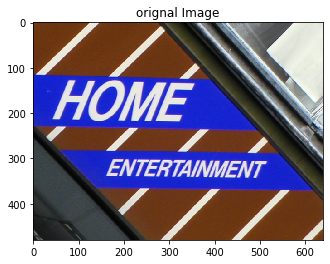

In [34]:
plt.title("orignal Image")
plt.imshow(orignal)

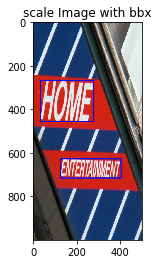

In [35]:
plt.title("scale Image with bbx")
plt.imshow(scale)